In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set
recent_date = session.query(func.max(Measurement.date)).first()
print (recent_date)

('2017-08-23',)


Date             object
Precipitation     int64
dtype: object
Missing values:
 Date             0.0
Precipitation    0.0
dtype: float64
Date             object
Precipitation     int64
dtype: object


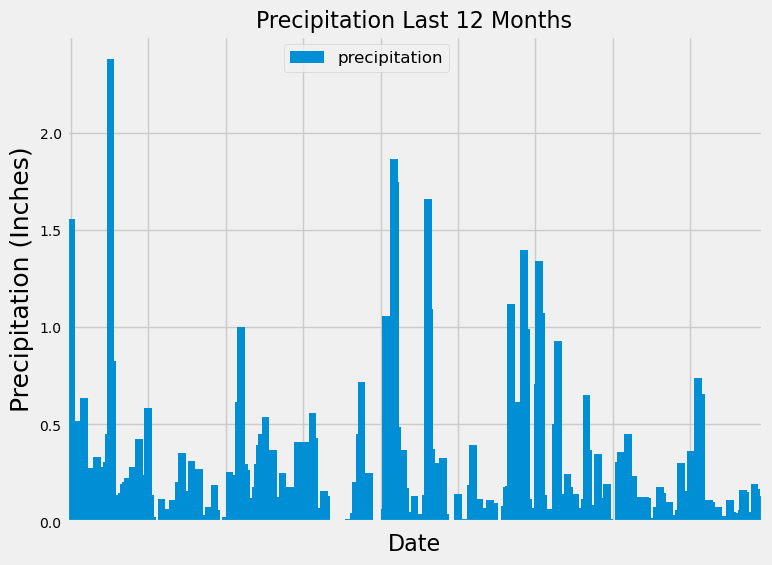

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year
# Starting from the most recent data point in the database. 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

# Perform a query to retrieve the data and precipitation scores

prcp_scores_query = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date >= last_year).\
        group_by(Measurement.date).all()

prcp_scores_query


# Save the query results as a Pandas DataFrame. Explicitly set the column names

prcp_df = pd.DataFrame(prcp_scores_query, columns=['date', 'precipitation'])
#prcp_df.set_index('date', inplace=True)
prcp_df.head()

# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
# Check data types and missing values
print(df.dtypes)
print("Missing values:\n", df.isnull().sum())

# Convert 'Precipitation' column to numeric if it's not already
df['Precipitation'] = pd.to_numeric(df['Precipitation'], errors='coerce')

# Check data types again
print(df.dtypes)

# Drop rows with missing values (if any)
df = df.dropna(subset=['Precipitation'])

# Use Pandas Plotting with Matplotlib to plot the data
plot = prcp_df.plot(kind='bar', width=4, figsize=(8,6))
plt.locator_params(axis='x', nbins=9)
plot.xaxis.set_major_formatter(plt.NullFormatter())
plot.tick_params(axis='y', labelsize=10)
plot.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="12")
plt.title("Precipitation Last 12 Months", size=16)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=16)
plt.savefig("graph.png")
plt.show()

In [40]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [41]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [42]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_station[0][0]  #placing the station ID and the count in both lists 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_result = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= last_year )
temp_result_df = pd.DataFrame(temp_result)
#temp_result_df.set_index('station', inplace=True)
temp_result_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


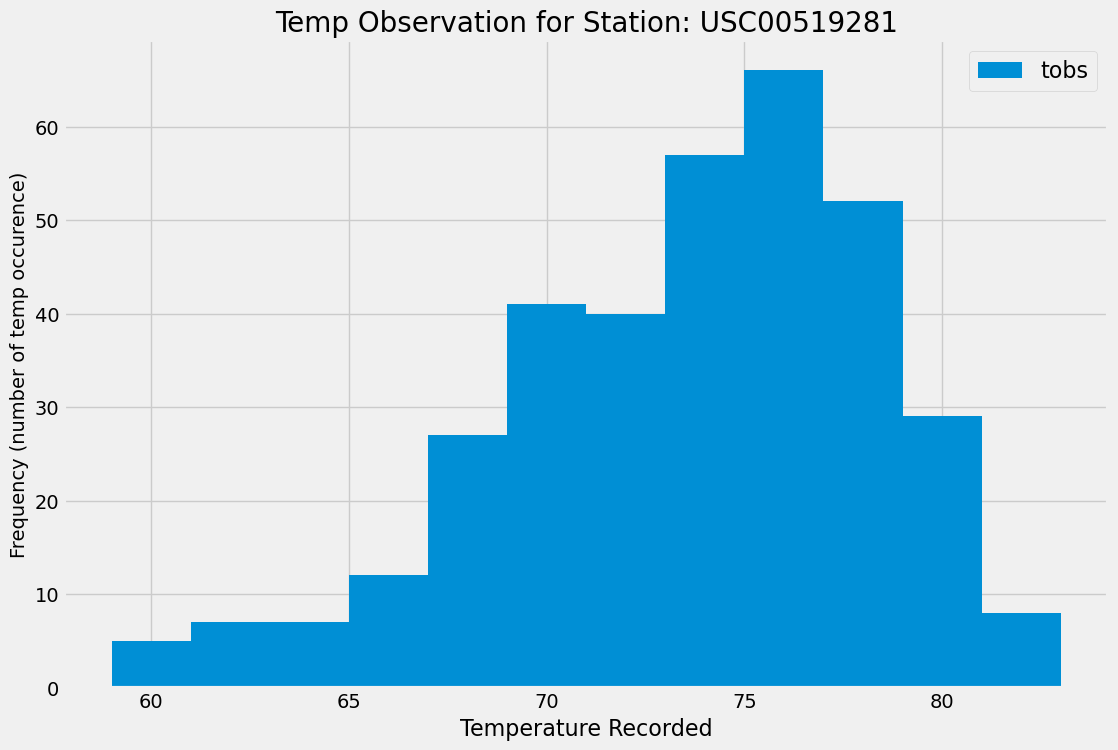

In [45]:
#plot the station USC00519281 results as a histogram
temp_result_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid(True)
plt.title(f'Temp Observation for Station: {most_active_station}',fontsize=20)
plt.xlabel("Temperature Recorded", fontsize=16)
plt.ylabel("Frequency (number of temp occurence)")
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("graph.png")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()